**Import Libaries and data**



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from textblob import TextBlob

df = pd.read_csv('netflix_titles.csv')


**Checking number of rows and columns in data**

In [ ]:
df.shape

(8807, 12)

**Checking content available in Dataset**

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


**How to check columns name of dataset**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Taking the count of ratings available**

In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')
print(x)

      rating  counts
0     66 min       1
1     74 min       1
2     84 min       1
3          G      41
4      NC-17       3
5         NR      80
6         PG     287
7      PG-13     490
8          R     799
9      TV-14    2160
10      TV-G     220
11     TV-MA    3207
12     TV-PG     863
13      TV-Y     307
14     TV-Y7     334
15  TV-Y7-FV       6
16        UR       3


**Creating the Piechart based on Content rating**

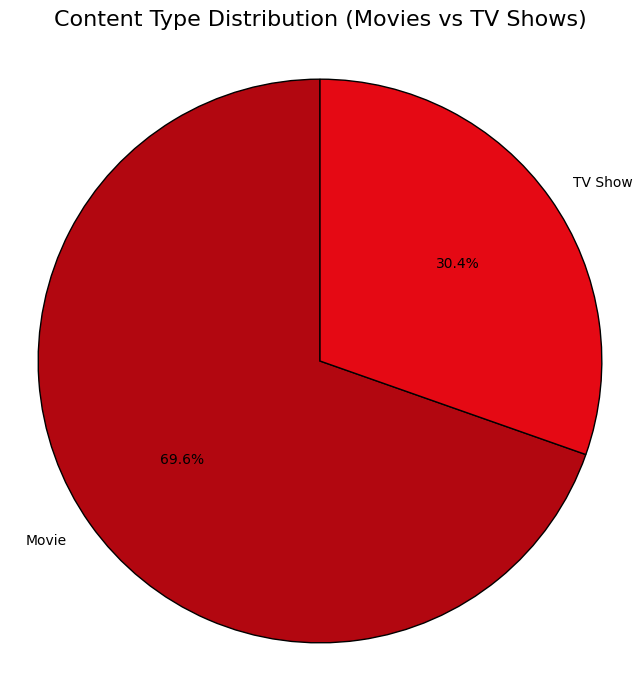

In [ ]:
type_count = df.groupby('type').size().reset_index(name='count')

plt.figure(figsize=(8, 8))
plt.pie(
    type_count['count'],
    labels=type_count['type'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#b20710', '#e50914'],
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Content Type Distribution (Movies vs TV Shows)', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

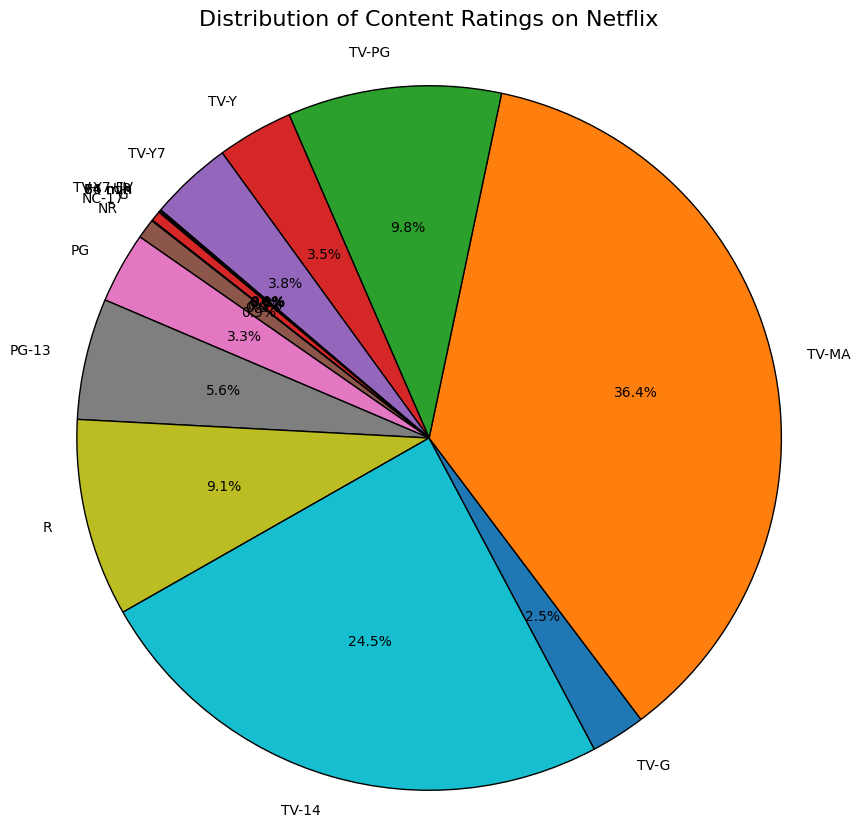

In [ ]:
x = df.groupby(['rating']).size().reset_index(name='counts')

plt.figure(figsize=(10, 10))
plt.pie(
    x['counts'],
    labels=x['rating'],
    autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True}
)
plt.title('Distribution of Content Ratings on Netflix', fontsize=16, pad=20)
plt.axis('equal')
plt.show()

**Analyzing the top 5 Directors on Netflix**

In [ ]:
df['director']=df['director'].fillna('Director not specified')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Director not specified,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Director not specified,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Director not specified,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
directors_list = pd.DataFrame()
print(directors_list)

Empty DataFrame
Columns: []
Index: []


In [ ]:
directors_list = df['director'].str.split(',',expand=True).stack()
print(directors_list)

0     0           Kirsten Johnson
1     0    Director not specified
2     0           Julien Leclercq
3     0    Director not specified
4     0    Director not specified
                    ...          
8802  0             David Fincher
8803  0    Director not specified
8804  0           Ruben Fleischer
8805  0              Peter Hewitt
8806  0               Mozez Singh
Length: 9612, dtype: object


In [ ]:
directors_list = directors_list.to_frame()
print(directors_list)

                             0
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors_list.columns = ['Director']
print(directors_list)

                      Director
0    0         Kirsten Johnson
1    0  Director not specified
2    0         Julien Leclercq
3    0  Director not specified
4    0  Director not specified
...                        ...
8802 0           David Fincher
8803 0  Director not specified
8804 0         Ruben Fleischer
8805 0            Peter Hewitt
8806 0             Mozez Singh

[9612 rows x 1 columns]


In [ ]:
directors = directors_list.groupby(['Director']).size().reset_index(name='Total Count')
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5121 rows x 2 columns]


In [ ]:
directors = directors[directors.Director != 'Director not specified']

In [ ]:
print(directors)

                       Director  Total Count
0                Aaron Moorhead            2
1                   Aaron Woolf            1
2      Abbas Alibhai Burmawalla            1
3              Abdullah Al Noor            1
4           Abhinav Shiv Tiwari            1
...                         ...          ...
5116                Çagan Irmak            1
5117           Ísold Uggadóttir            1
5118        Óskar Thór Axelsson            1
5119           Ömer Faruk Sorak            2
5120               Şenol Sönmez            2

[5120 rows x 2 columns]


In [ ]:
directors = directors.sort_values(by=['Total Count'], ascending = False)
print(directors)

                 Director  Total Count
4021        Rajiv Chilaka           22
4068          Raúl Campos           18
261             Jan Suter           18
3236         Marcus Raboy           16
4652          Suhas Kadav           16
...                   ...          ...
2331  Ivan Andrew Payawal            1
610    Songyos Sugmakanan            1
611          Sonia Dauger            1
612        Sophie Sartain            1
2336           Ivona Juka            1

[5120 rows x 2 columns]


In [ ]:
top5Directors = directors.head()
print(top5Directors)

           Director  Total Count
4021  Rajiv Chilaka           22
4068    Raúl Campos           18
261       Jan Suter           18
3236   Marcus Raboy           16
4652    Suhas Kadav           16


/tmp/ipython-input-2111417220.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




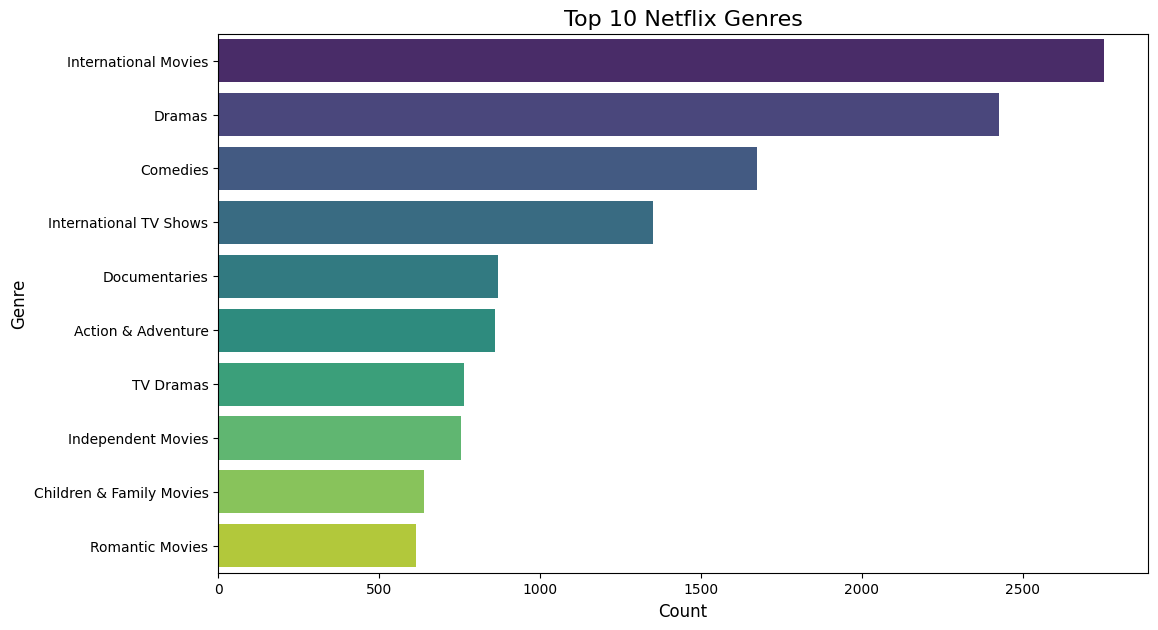

In [ ]:
genre_series = df['listed_in'].str.split(',').explode().str.strip()
genre_count = genre_series.value_counts().reset_index()
genre_count.columns = ['genre', 'count']
top_10_genres = genre_count.head(10)

plt.figure(figsize=(12, 7))

sns.barplot(
    x='count',
    y='genre',
    data=top_10_genres.sort_values(by='count', ascending=False),
    palette="viridis"
)
plt.title('Top 10 Netflix Genres', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

/tmp/ipython-input-1229289900.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




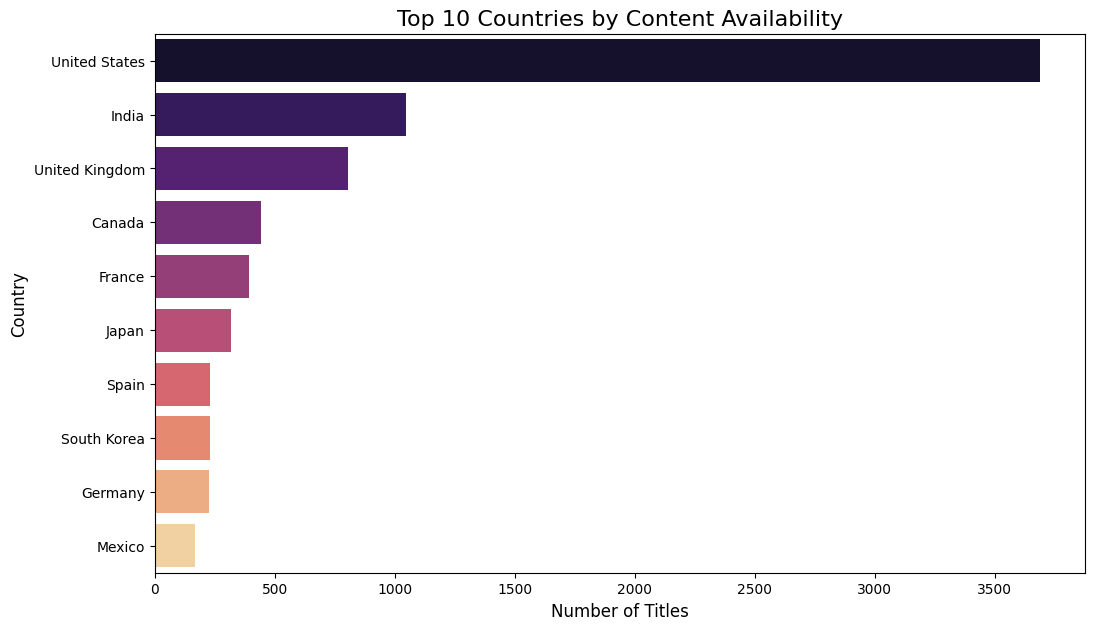

In [ ]:
country_series = df['country'].str.split(',').explode().str.strip()
country_count = country_series.value_counts().reset_index()
country_count.columns = ['country', 'count']
top_10_countries = country_count.head(10)

plt.figure(figsize=(12, 7))
sns.barplot(
    x='count',
    y='country',
    data=top_10_countries.sort_values(by='count', ascending=False),
    palette="magma"
)
plt.title('Top 10 Countries by Content Availability', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()

/tmp/ipython-input-3697421644.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




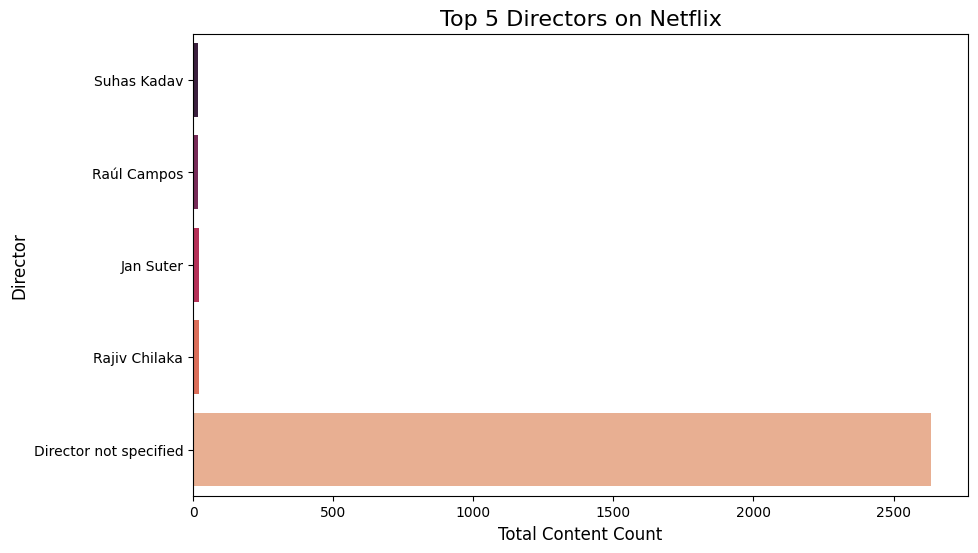

In [ ]:
df['director'].fillna('No Director', inplace=True)
director_df = pd.DataFrame(df['director'].str.split(',', expand=True).stack().str.strip())
director_df.columns = ['Director']
directors = director_df.groupby(['Director']).size().reset_index(name='Total Count')
directors = directors[directors['Director'] != 'No Director']
top5Directors = directors.sort_values(by=['Total Count'], ascending=False).head(5)

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Total Count',
    y='Director',
    data=top5Directors.sort_values(by=['Total Count'], ascending=True),
    palette="rocket"
)
plt.title('Top 5 Directors on Netflix', fontsize=16)
plt.xlabel('Total Content Count', fontsize=12)
plt.ylabel('Director', fontsize=12)
plt.show()

**Analyzing the top 5 Actors on Netflix**

/tmp/ipython-input-1292983226.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




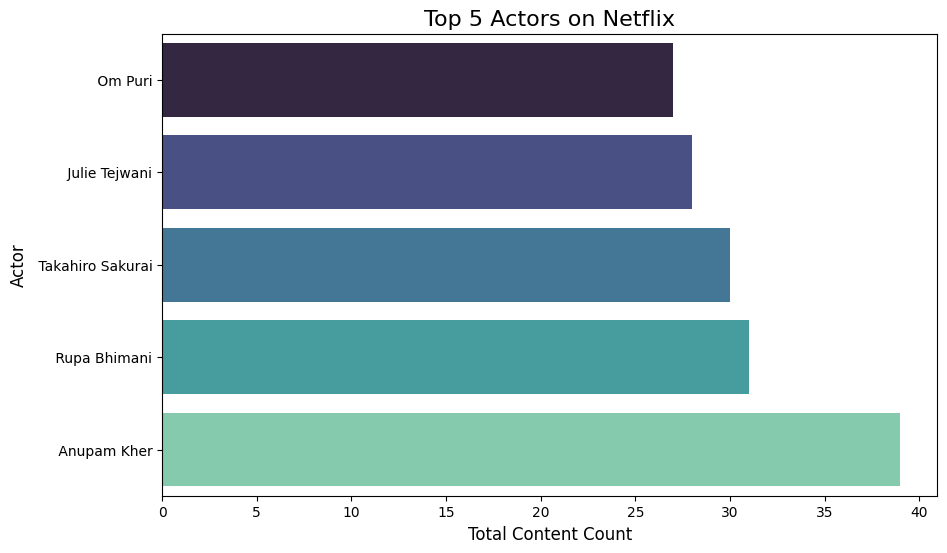

In [ ]:
df['cast']=df['cast'].fillna('No cast specified')
cast_df = pd.DataFrame()
cast_df = df['cast'].str.split(',',expand=True).stack()
cast_df = cast_df.to_frame()
cast_df.columns = ['Actor']
actors = cast_df.groupby(['Actor']).size().reset_index(name= 'Total Count')
actors = actors[actors.Actor != 'No cast specified']
actors = actors.sort_values(by=['Total Count'], ascending=False)
top5Actors = actors.head()

plt.figure(figsize=(10, 6))

sns.barplot(
    x='Total Count',
    y='Actor',
    data=top5Actors.sort_values(by=['Total Count'], ascending=True),
    palette="mako"
)
plt.title('Top 5 Actors on Netflix', fontsize=16)
plt.xlabel('Total Content Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)
plt.show()

**Analyzing the content produced on netflix based on years**

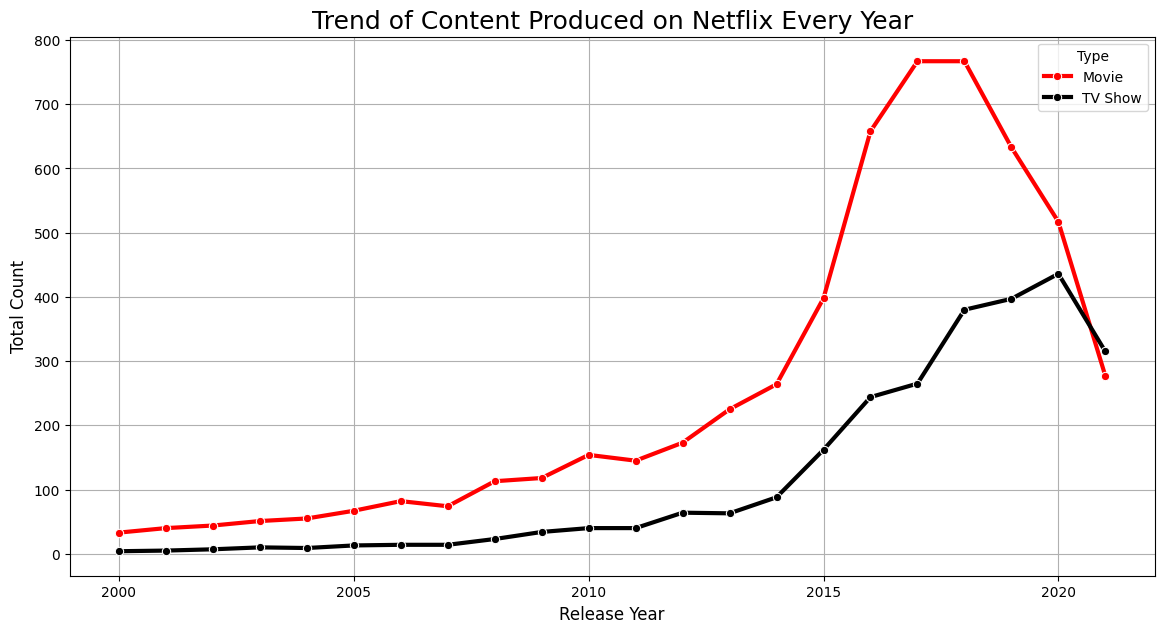

In [ ]:
df2 = df.groupby(['release_year', 'type']).size().reset_index(name='Total Count')
df2.columns = ['Release Year', 'Type', 'Total Count']
df2 = df2[df2['Release Year']>=2000]

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df2,
    x="Release Year",
    y="Total Count",
    hue="Type",
    palette=['red', 'black'],
    linewidth=3,
    marker='o'
)
plt.title('Trend of Content Produced on Netflix Every Year', fontsize=18)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.grid(True)
plt.show()

In [ ]:
print(df2)

     Release Year     Type  Total Count
75           2000    Movie           33
76           2000  TV Show            4
77           2001    Movie           40
78           2001  TV Show            5
79           2002    Movie           44
80           2002  TV Show            7
81           2003    Movie           51
82           2003  TV Show           10
83           2004    Movie           55
84           2004  TV Show            9
85           2005    Movie           67
86           2005  TV Show           13
87           2006    Movie           82
88           2006  TV Show           14
89           2007    Movie           74
90           2007  TV Show           14
91           2008    Movie          113
92           2008  TV Show           23
93           2009    Movie          118
94           2009  TV Show           34
95           2010    Movie          154
96           2010  TV Show           40
97           2011    Movie          145
98           2011  TV Show           40


**Sentiment Analysis of Netflix Content**

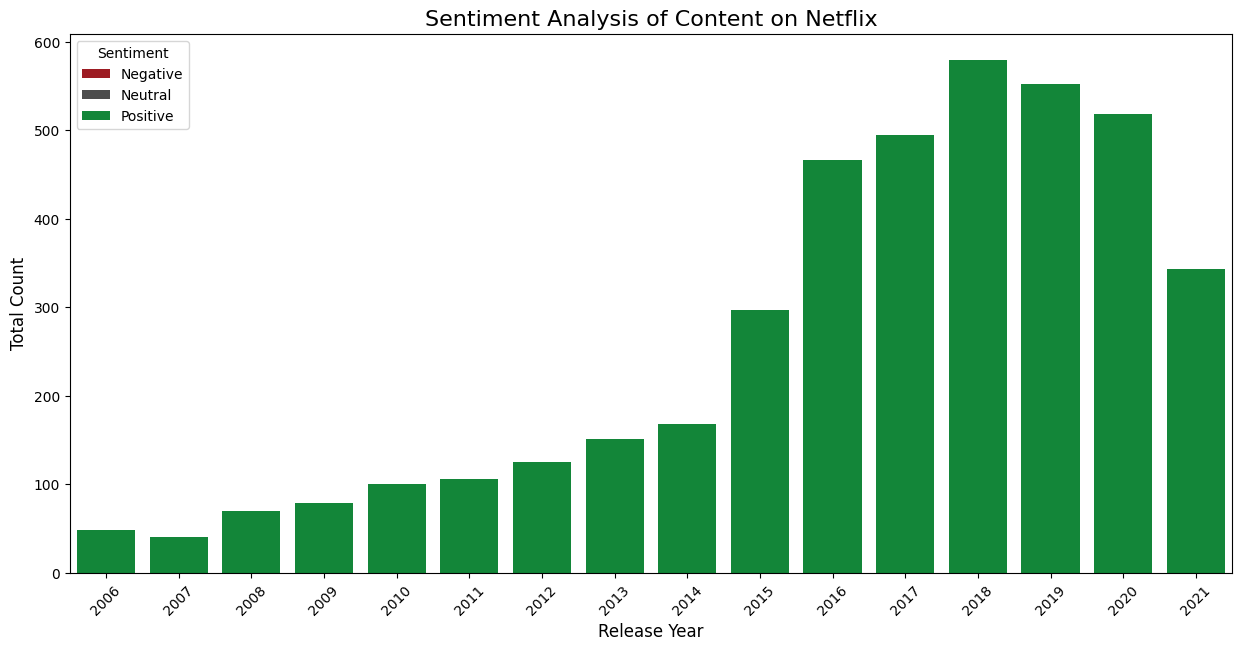

In [ ]:
df3 = df[['release_year', 'description']]
df3 = df3.rename(columns = {"release_year":'Release Year', 'description':'Description'})


for index, row in df3.iterrows():
  d=row['Description']
  testimonial = TextBlob(d)
  p = testimonial.sentiment.polarity

  if p==0:
    sent = 'Neutral'
  elif p>0:
    sent = 'Positive'
  else:
    sent = 'Negative'


  df3.loc[index, 'Sentiment']=sent


df3 = df3.groupby(['Release Year', 'Sentiment']).size().reset_index(name = 'Total Count')
df3 = df3[df3['Release Year']>2005]


plt.figure(figsize=(15, 7))

sns.barplot(
    data=df3,
    x="Release Year",
    y="Total Count",
    hue="Sentiment",
    palette=["#b20710", "#4d4d4d", "#009933"],
    dodge=False
)
plt.title('Sentiment Analysis of Content on Netflix', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Total Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

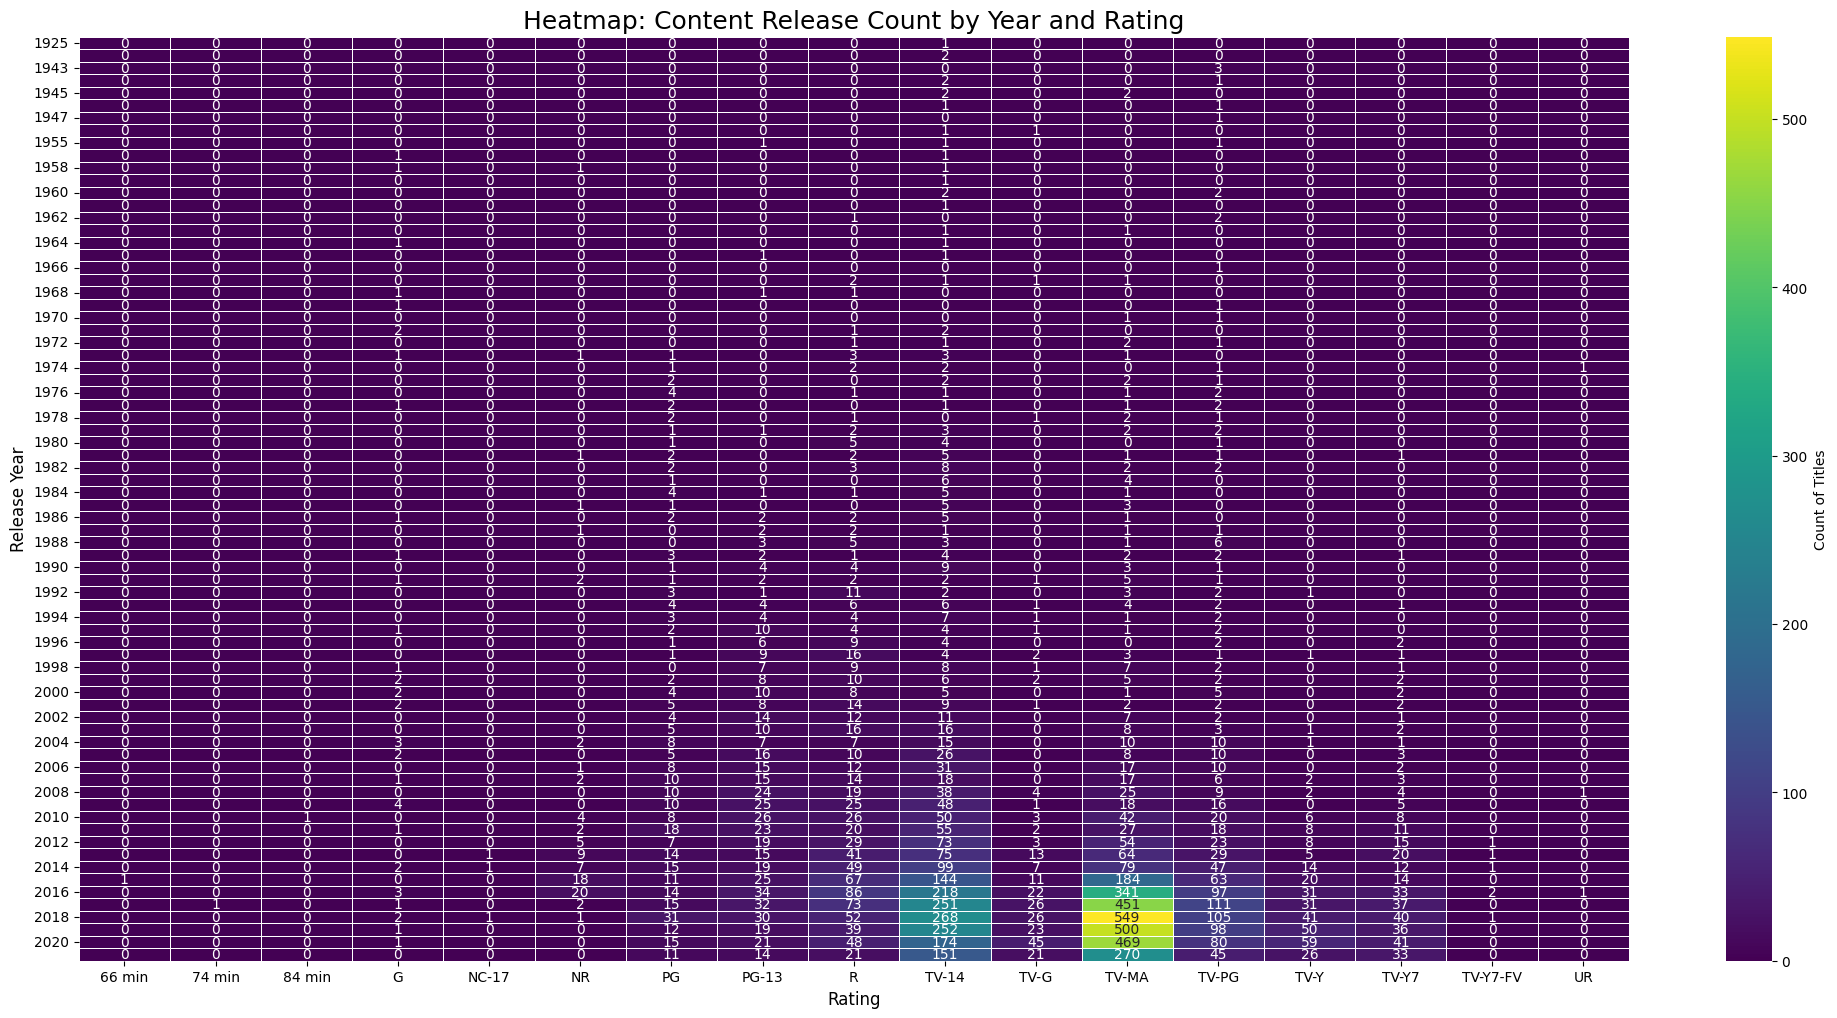

In [ ]:

release_rating_counts = df.groupby(['release_year', 'rating']).size().reset_index(name='count')
pivot_rr = release_rating_counts.pivot(index='release_year', columns='rating', values='count').fillna(0)


plt.figure(figsize=(25, 12))


sns.heatmap(
    pivot_rr,
    annot=True,
    fmt='g',
    cmap='viridis',
    linewidths=.5,
    cbar_kws={'label': 'Count of Titles'}
)

plt.title('Heatmap: Content Release Count by Year and Rating', fontsize=18)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Release Year', fontsize=12)
plt.show()

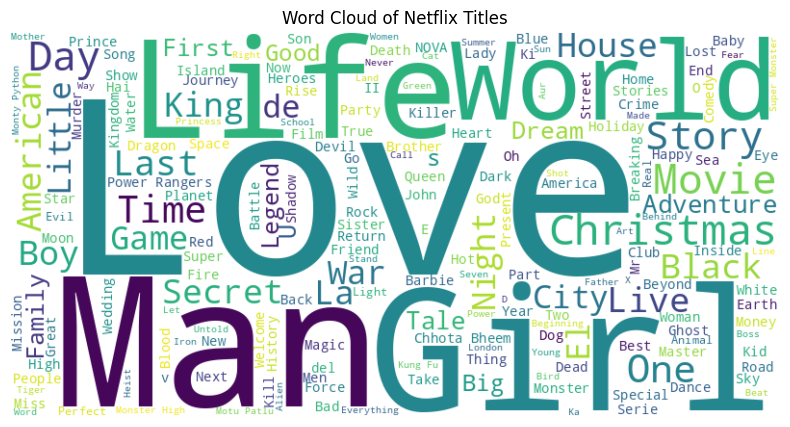

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

title_text = ' '.join(df['title'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()

/tmp/ipython-input-1560110874.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




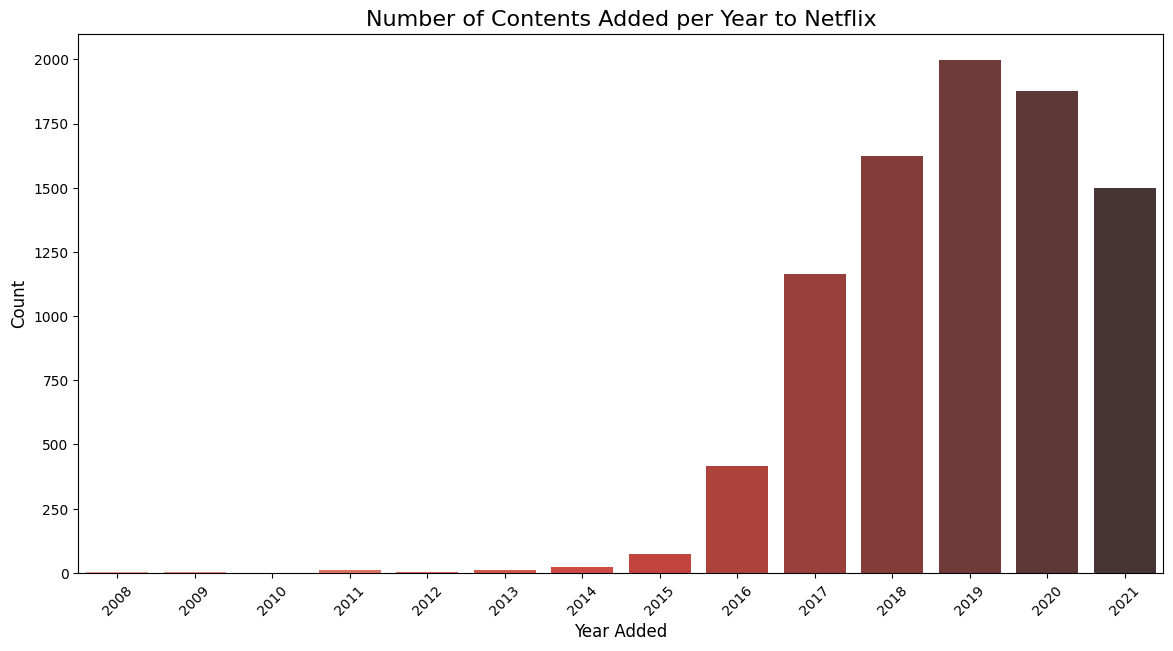

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df_date = df.dropna(subset=['date_added'])
df_date['year_added'] = df_date['date_added'].dt.year
added_per_year = df_date.groupby('year_added').size().reset_index(name='count')

plt.figure(figsize=(14, 7))
sns.barplot(
    data=added_per_year,
    x='year_added',
    y='count',
    palette='Reds_d'
)
plt.title('Number of Contents Added per Year to Netflix', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [ ]:

df[['duration_num', 'duration_unit']] = df['duration'].str.split(' ', expand=True)
df['duration_num'] = pd.to_numeric(df['duration_num'], errors='coerce')

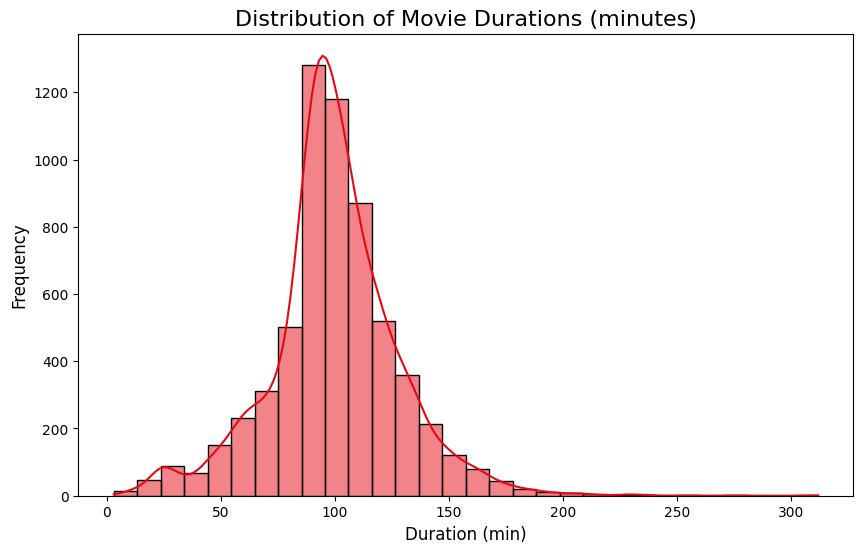

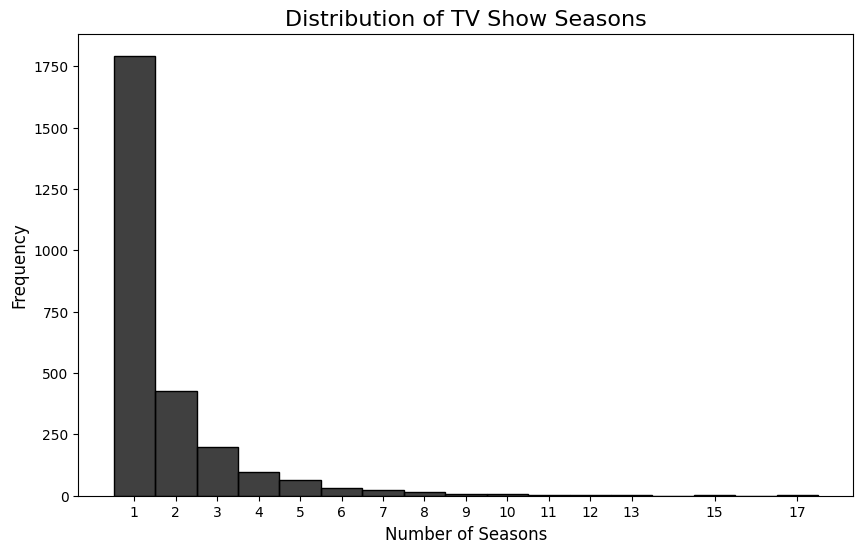

In [ ]:
movies_duration = df[df['type'] == 'Movie']['duration_num'].dropna()
tv_seasons = df[df['type'] == 'TV Show']['duration_num'].dropna()


plt.figure(figsize=(10, 6))
sns.histplot(
    movies_duration,
    bins=30,
    kde=True,
    color='#e50914'
)
plt.title('Distribution of Movie Durations (minutes)', fontsize=16)
plt.xlabel('Duration (min)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


plt.figure(figsize=(10, 6))

sns.histplot(
    tv_seasons,
    bins=int(tv_seasons.max()),
    discrete=True,
    color='black'
)
plt.title('Distribution of TV Show Seasons', fontsize=16)
plt.xlabel('Number of Seasons', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(tv_seasons.unique().astype(int))
plt.show()